# Data Challenge of Personal Loan Convention

In [1]:
# print the result respectively in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


from pyzipcode import ZipCodeDatabase
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from uszipcode import SearchEngine, SimpleZipcode

c:\users\jerry\envs\nlp\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# import dataset and print the first 5 rows
df = pd.read_csv('Dataset.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis

In [4]:
# check the datatype, most of datatype are int, only one is float
# seems no null values, but not sure if it has any NaN values
# the shape of df is (5000, 14)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

<AxesSubplot:>

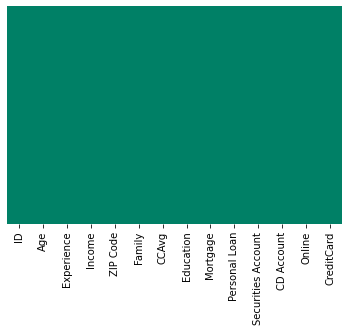

In [5]:
# no null values and NaN values for sure
# a heatmap for data visualizition
df.isnull().any()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='summer')

In [6]:
# statistical summary
# min of Experience is -3, Experience should not have negative numbers 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

[Text(0, 0, '3462'), Text(0, 0, '1538')]

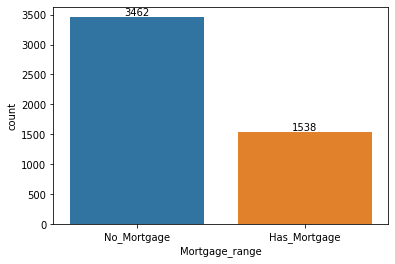

In [8]:
# number of people with zero mortgage
Mortgage_range = pd.cut(df['Mortgage'],[-1,0,650], labels = ['No_Mortgage','Has_Mortgage'])
df['Mortgage_range'] = Mortgage_range
ax = sns.countplot(x='Mortgage_range', data=df)
ax.bar_label(ax.containers[0])

# drop the column afterward
df = df.drop(['Mortgage_range'], axis=1)

[Text(0, 0, '106'), Text(0, 0, '4894')]

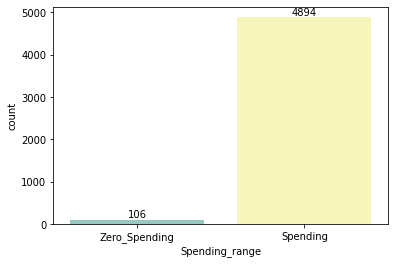

In [9]:
# number of people with zero credit card spending per month
Spending_range = pd.cut(df['CCAvg'],[-1,0,10], labels = ['Zero_Spending','Spending'])
df['Spending_range'] = Spending_range
ax1 = sns.countplot(x='Spending_range', data=df, palette="Set3")
ax1.bar_label(ax1.containers[0])

# drop the column afterward
df = df.drop(['Spending_range'], axis=1)

In [10]:
# value counts of all categorical columns.
# the num count of categorical columns is 8 
# since the ZIP Code is also a categorical variable, thus I move it to here. 
# remove the target variable 'Personal Loan'
categorical_columns = [col for col in df.columns if df[col].nunique() <= 5]
categorical_columns.append('ZIP Code')
categorical_columns.remove('Personal Loan')
print(categorical_columns)
print('the num count of categorical columns is:',len(categorical_columns))

# categorical dataframe prepares for the below graph

categorical = df[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code']]

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code']
the num count of categorical columns is: 7


In [11]:
# value counts of all numerical columns.
# and the the num count of numerical columns is 6
# remove the ID which is meaningless
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]
numerical_columns.remove('ID')
numerical_columns.remove('ZIP Code')
numerical_columns
print('The num count of categorical columns is:',len(numerical_columns))

# numerical dataframe prepares for the below graph
numerical = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

The num count of categorical columns is: 5


## Univariate and Bivariate

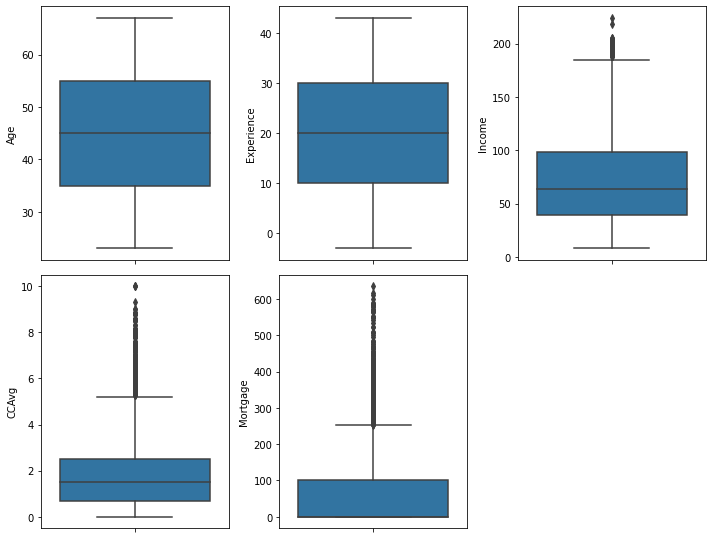

In [12]:
# Univariate analysis for numerical columns

fig = plt.figure(figsize=(10,15))
for i in range(len(numerical_columns)):
    fig.add_subplot(4, 3,i+1)
    sns.boxplot(y=numerical.iloc[:,i])

plt.tight_layout()
plt.show();

#### Observation
1. Kind of outliers shows in the Income, CCAvg, and Mortgage
2. Parts of outliers need to be removed 

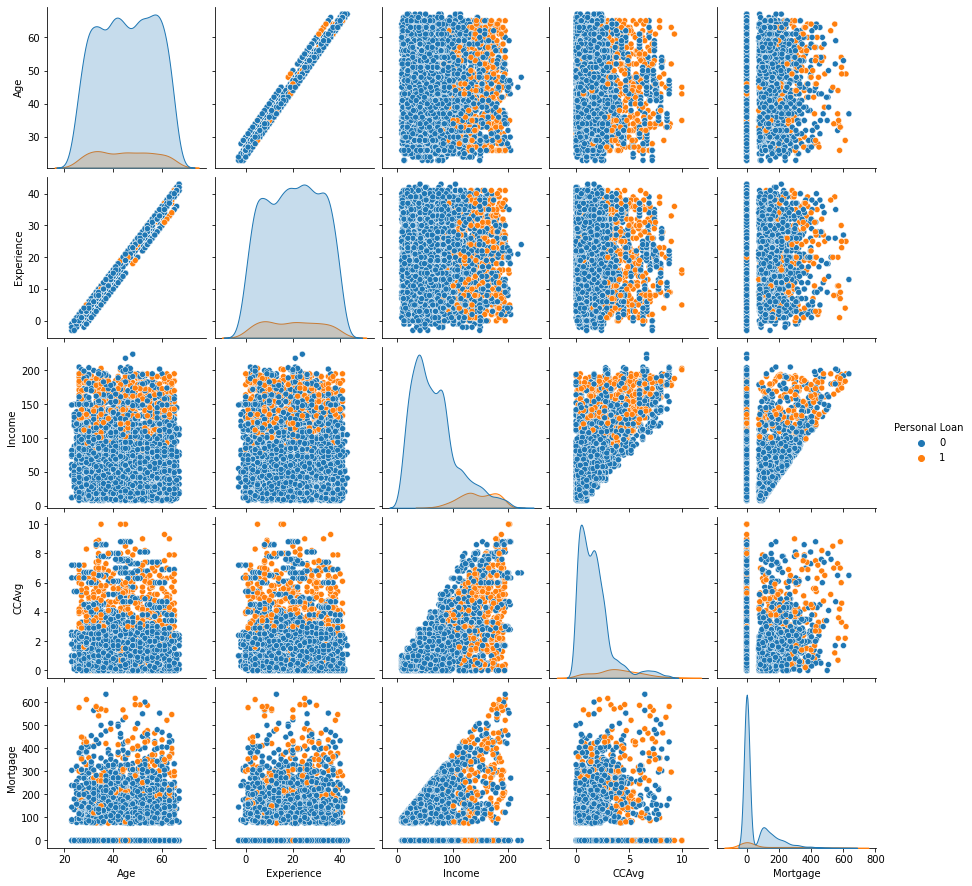

In [13]:
# Bivariate analysis for numerical columns

sns.pairplot(df,
    x_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
    y_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
             diag_kind="kde",hue="Personal Loan")
plt.show()

In [14]:
# Skewness scores
print('The skewness score of Age attribute:', df['Age'].skew())
print('The skewness score of Experience attribute:', df['Experience'].skew())
print('The skewness score of Income attribute:', df['Income'].skew())
print('The skewness score of CCAvg attribute:', df['CCAvg'].skew())
print('The skewness score of Mortgage attribute:', df['Mortgage'].skew())

The skewness score of Age attribute: -0.02934068151284029
The skewness score of Experience attribute: -0.026324688402384513
The skewness score of Income attribute: 0.8413386072610816
The skewness score of CCAvg attribute: 1.5984433366678663
The skewness score of Mortgage attribute: 2.1040023191079444


#### Observation
1. Age and Experience are normally distributed
2. The distribution of Income, CCAvg, and Mortgage attributes are various levels of right skewness
3. Age and Experience look like highly correlated
4. Age is conditionally independent because no matter what Age is, the more the income, CCAvg, Mortgage they have, the higher posibility they accepted the Personal Loan 
5. It's make sense that the clients would not get large amount of mortgage and CCAvg id their income 

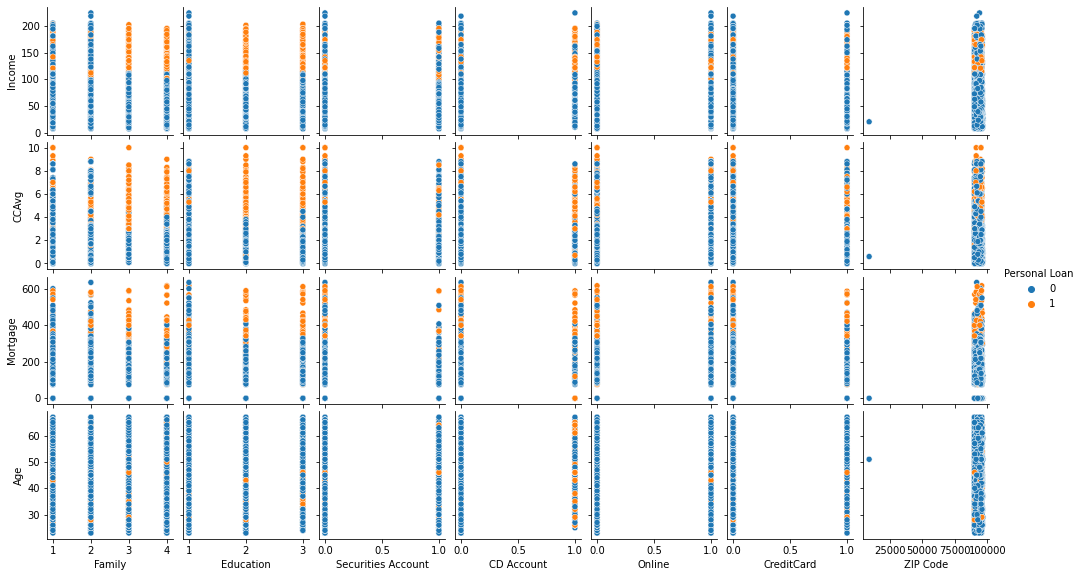

In [15]:
# Bivariate analysis for categorical columns

g = sns.pairplot(df,
    x_vars=['Family', 'Education', 'Securities Account', 'CD Account', 'Online',  'CreditCard', 'ZIP Code'],
    y_vars=['Income', 'CCAvg', 'Mortgage', 'Age'], 
            hue="Personal Loan")
g.fig.set_size_inches(15,8)
plt.show();

### Observation
1. Family size, educational level, and CD Account have a relatively big impact on whether or not accept the personal loan
2. Try to remove the outlier of ZIP Code to see the distribution in details

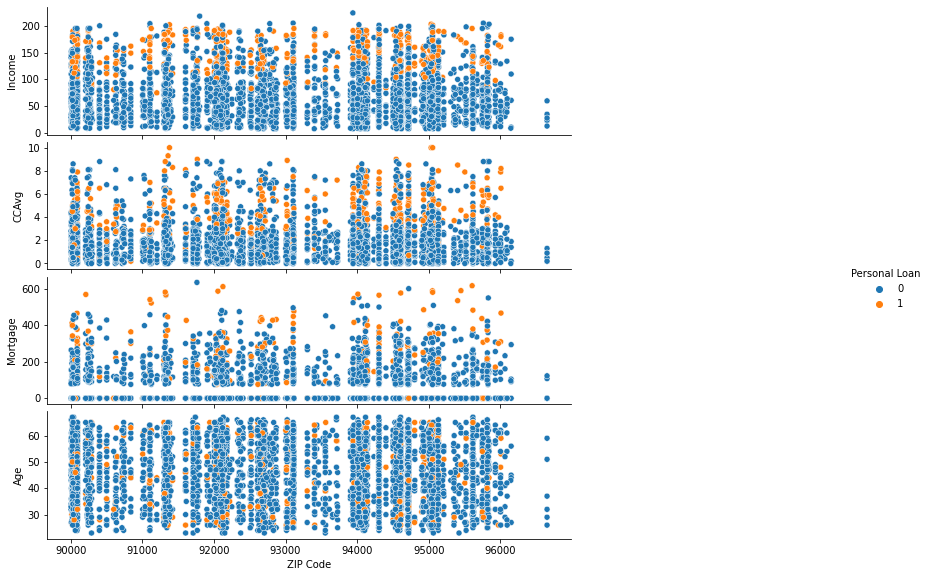

In [16]:
# remove the outlier of ZIP Code
df = df.drop(df[df['ZIP Code'] < 50000].index)

# Bivariate analysis for ZIP Code
g = sns.pairplot(df,
    x_vars=['ZIP Code'],
    y_vars=['Income', 'CCAvg', 'Mortgage', 'Age'], 
            hue="Personal Loan")
g.fig.set_size_inches(15,8)
plt.show();

In [17]:
# below zip code scatter map looks not much information provided since the distribution of ZIP Code seems pretty diversified
# try to seek the count of different zipcode to check how location is correlated to if the customers accepted the personal loan
# want to get top 10 maximum count of zip code
top10 = df.groupby(['ZIP Code']).size()
top10.nlargest(10)

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
dtype: int64

In [18]:
top10_PL = df.groupby(['ZIP Code', 'Personal Loan']).size().groupby(level=1)
top10_PL.nlargest(10)

Personal Loan  ZIP Code  Personal Loan
0              94720     0                150
               94305     0                114
               95616     0                110
               90095     0                 63
               93106     0                 53
               91320     0                 51
               93943     0                 50
               90024     0                 49
               92037     0                 49
               91711     0                 48
1              94720     1                 19
               94305     1                 13
               92093     1                  9
               90089     1                  8
               90095     1                  8
               94304     1                  8
               92182     1                  7
               94022     1                  6
               95051     1                  6
               95616     1                  6
dtype: int64

In [19]:
# zcdb = ZipCodeDatabase()
# zcdb[94720]
# zcdb[94720].city()

#### Observation
1. The scatter plot of ZIP Code shows pretty randomly distributed
2. top10_PL 


<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Correlation of Attributes')

<AxesSubplot:title={'center':'Correlation of Attributes'}>

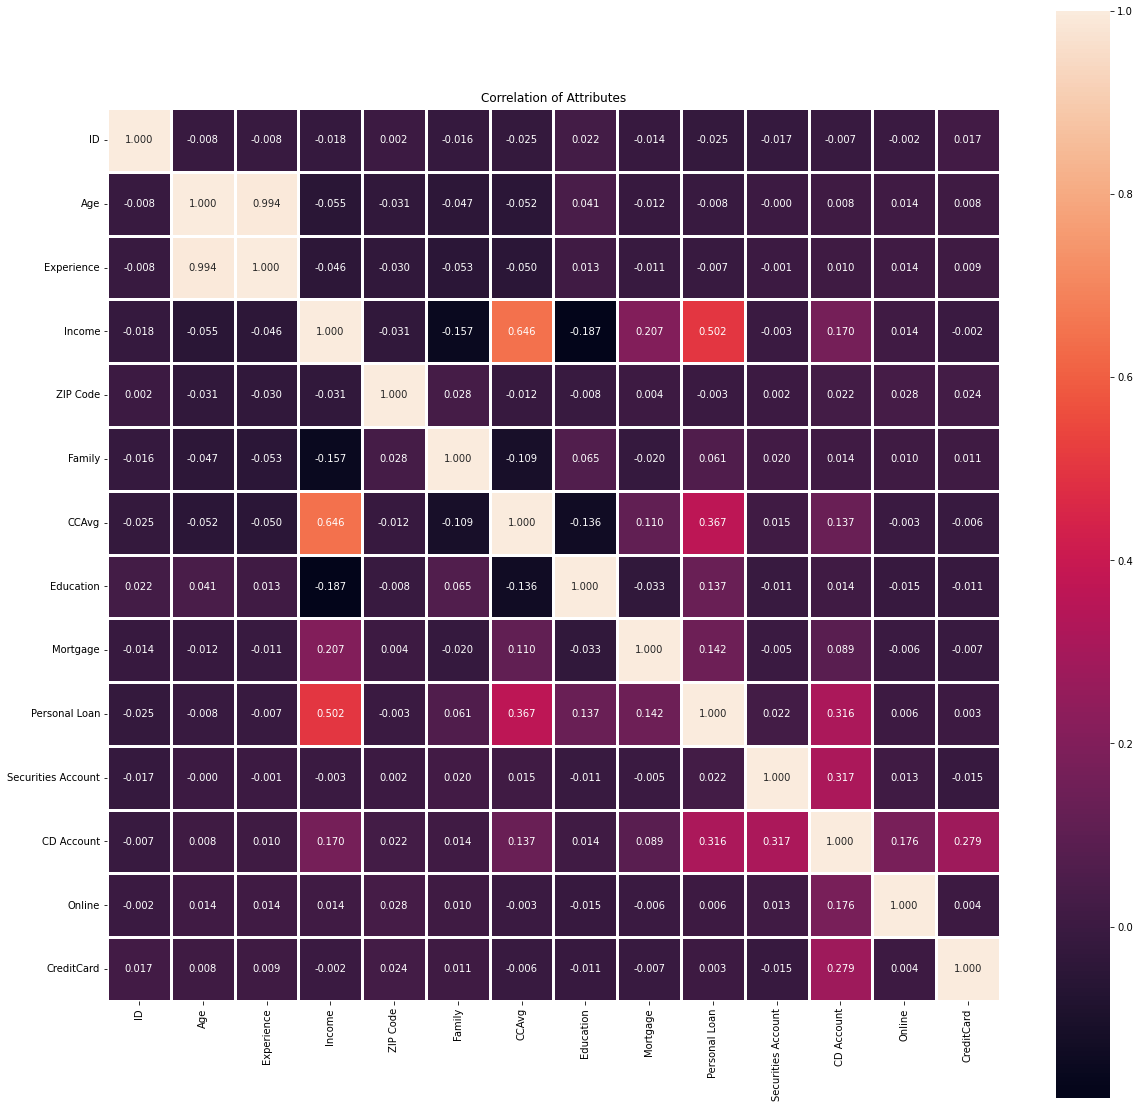

In [20]:
# coefficient correlation headmap

plt.figure(figsize=(20,20))
plt.title('Correlation of Attributes')
sns.heatmap(df.corr(), annot=True, square=True, linewidths=3, fmt='.3f')

#### Observation
* Age and Experience are highly correlated for sure
* remove Experience for sure as Experience has negative values need to be handled

## Data Cleaning

In [21]:
# remove some outliers of Income, CCAvg, and Mortgage
df = df.drop(df[df['Income'] >= 210].index)
df = df.drop(df[df['CCAvg'] >= 10].index)
df = df.drop(df[df['Mortgage'] >= 600].index)

In [22]:
df = df.reset_index()

In [23]:
# a function to find out the median household income related from ZIP Code
def countyfind(data):
    search = SearchEngine()
    median_household_income = []
    for zipcode in data:
        area_info = search.by_zipcode(str(zipcode))
        if area_info is None or area_info.median_household_income is None:
            median_household_income.append(np.nan)
        else:
            median_household_income.append(area_info.median_household_income)
    return median_household_income

In [24]:
# convert the zip code to be median household income
# add it into the dataframe as well
median_household_income = countyfind(df['ZIP Code'])
df['Household Income'] = median_household_income
df.head()

,index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Household Income
0,0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,80936.0
1,1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,NaN
2,2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,NaN
3,3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,71625.0
4,4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,NaN


In [26]:
# check if any null values after adding a new column
df.isnull().any()

index                 False
ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Household Income       True
dtype: bool

In [27]:
# ordering by zipcode first
df = df.sort_values('ZIP Code')

# remove null with last observation value because last zipcode is the similar zipcode had Null values, assuming they have similar values
df['Household Income'] = df['Household Income'].fillna(method='ffill')

# set zipgroup is hard to locate nan
# df['zipgroup'] = pd.cut(df['ZIP Code'], bins=50)

In [33]:
# seperate the target variavle and independent variables
# and drop some useless columns
df_y = df['Personal Loan']
df.drop(['ZIP Code', 'ID', 'Experience', 'Personal Loan'], axis = 1, inplace = True)
df.head()

,index,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Household Income
650,652,34,92,1,2.80,1,0,0,0,1,0,31893.0
1616,1619,45,29,1,0.30,3,0,0,0,1,0,31893.0
4178,4186,33,10,4,1.00,1,81,0,0,0,1,31893.0
1466,1469,59,59,4,1.20,2,0,0,0,1,0,31893.0
1678,1681,32,141,2,4.33,1,0,0,0,0,0,31893.0


In [34]:
# normalize the numerical data of 'Age', 'Income', 'Family', 'Education', 'CCAvg', 'Mortgage' attributes
# use preprocessing to normalize
df_normalization = df[['Age', 'Income', 'Family', 'Education', 'CCAvg', 'Mortgage', 'Household Income']]
feature_names = df_normalization.columns
scaler = StandardScaler()
scaler.fit(df_normalization)
df_normalization = scaler.transform(df_normalization)
df_normalization = pd.DataFrame(df_normalization, columns = feature_names)
df_normalization

StandardScaler()

,Age,Income,Family,Education,CCAvg,Mortgage,Household Income
0,-0.988968,0.403227,-1.216963,-1.049309,0.501525,-0.558144,-1.545705
1,-0.029828,-0.973968,-1.216963,1.332880,-0.940186,-0.558144,-1.545705
2,-1.076163,-1.389313,1.397551,-1.049309,-0.536507,0.247473,-1.545705
3,1.190896,-0.318161,1.397551,0.141786,-0.421170,-0.558144,-1.545705
4,-1.163357,1.474380,-0.345458,-1.049309,1.383852,-0.558144,-1.545705
...,...,...,...,...,...,...,...
4985,-1.163357,-0.842807,0.526047,-1.049309,-0.363502,0.516013,-1.027133
4986,1.190896,-1.323732,1.397551,0.141786,-0.594176,-0.558144,-1.027133
4987,0.493340,-1.105130,-1.216963,-1.049309,-0.997855,-0.558144,-1.027133
4988,-1.686525,-1.083269,-0.345458,1.332880,-0.594176,0.665201,-1.027133


In [35]:
# replace the updated value into dataframe
df[['Age', 'Income', 'Family', 'Education', 'CCAvg', 'Mortgage', 'Household Income']] = df_normalization.values
df

,index,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Household Income
650,652,-0.988968,0.403227,-1.216963,0.501525,-1.049309,-0.558144,0,0,1,0,-1.545705
1616,1619,-0.029828,-0.973968,-1.216963,-0.940186,1.332880,-0.558144,0,0,1,0,-1.545705
4178,4186,-1.076163,-1.389313,1.397551,-0.536507,-1.049309,0.247473,0,0,0,1,-1.545705
1466,1469,1.190896,-0.318161,1.397551,-0.421170,0.141786,-0.558144,0,0,1,0,-1.545705
1678,1681,-1.163357,1.474380,-0.345458,1.383852,-1.049309,-0.558144,0,0,0,0,-1.545705
...,...,...,...,...,...,...,...,...,...,...,...,...
628,630,-1.163357,-0.842807,0.526047,-0.363502,-1.049309,0.516013,0,0,0,1,-1.027133
3518,3525,1.190896,-1.323732,1.397551,-0.594176,0.141786,-0.558144,0,0,0,0,-1.027133
670,672,0.493340,-1.105130,-1.216963,-0.997855,-1.049309,-0.558144,0,0,1,0,-1.027133
1650,1653,-1.686525,-1.083269,-0.345458,-0.594176,1.332880,0.665201,0,0,0,1,-1.027133


## Data Modeling

In [36]:
# seperate the X and Y dataset
X = df
y = df_y

In [37]:
# split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [38]:
# max_iter=1000 is a better number than default one for the solvers('lbfgs') to converge
logmodel = LogisticRegression(max_iter = 1000)

# model fitting
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# get the classification report
predictions_lr = logmodel.predict(X_test)
print(classification_report(y_test, predictions_lr))

# 
print('Accuracy of the train dataset: {:.4f}'.format(logmodel.score(X_train, y_train)))
print('Accuracy of the test dataset: {:.4f}'.format(logmodel.score(X_test, y_test)))
print('Area under the ROC curve: {:.4f}'.format(roc_auc_score(y_test, predictions_lr)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1357
           1       0.82      0.58      0.68       140

    accuracy                           0.95      1497
   macro avg       0.89      0.78      0.82      1497
weighted avg       0.94      0.95      0.94      1497

Accuracy of the train dataset: 0.9522
Accuracy of the test dataset: 0.9486
Area under the ROC curve: 0.7827


In [40]:
# train random forest to see if the f1-score is higher
rfmodel = RandomForestClassifier(random_state=42)

# model fitting
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# get the classification report
predictions_rf = rfmodel.predict(X_test)
print(classification_report(y_test, predictions_rf))

# 
print('Accuracy of the train dataset: {:.4f}'.format(rfmodel.score(X_train, y_train)))
print('Accuracy of the test dataset: {:.4f}'.format(rfmodel.score(X_test, y_test)))
print('Area under the ROC curve: {:.4f}'.format(roc_auc_score(y_test, predictions_rf)))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1357
           1       0.95      0.89      0.92       140

    accuracy                           0.99      1497
   macro avg       0.97      0.94      0.96      1497
weighted avg       0.99      0.99      0.99      1497

Accuracy of the train dataset: 1.0000
Accuracy of the test dataset: 0.9853
Area under the ROC curve: 0.9406


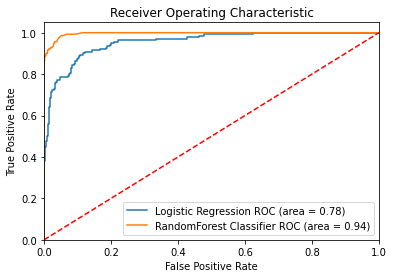

In [42]:
from sklearn import metrics
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': logmodel,
},
{
    'label': 'RandomForest Classifier',
    'model': rfmodel,
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();   # Display

In [43]:
# draw regression analysis table
features = list(df.iloc[:, 0:].columns)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary(xname=features))

Optimization terminated successfully.
         Current function value: 0.185875
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4990
Model:                          Logit   Df Residuals:                     4978
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Feb 2022   Pseudo R-squ.:                  0.4088
Time:                        00:07:42   Log-Likelihood:                -927.52
converged:                       True   LL-Null:                       -1568.8
Covariance Type:            nonrobust   LLR p-value:                2.626e-268
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
index                 -0.0008   3.72e-05    -22.154      0.000      -0.001      -0.001
Age  

<AxesSubplot:>

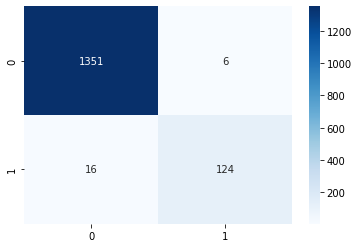

In [44]:
# confusion matrix headmap
sns.heatmap(confusion_matrix(y_test,predictions_rf), annot=True, fmt='', cmap='Blues')

In [45]:
y_predictions = pd.DataFrame(predictions_rf)
y_predictions

,0
0,1
1,0
2,0
3,1
4,0
...,...
1492,0
1493,0
1494,0
1495,0


In [46]:
# merge actual values and predicted values into X test dataset
df_xtest = X_test.reset_index()
df_xtest["Actual"] = y_test.reset_index()["Personal Loan"]
df_xtest["Prediction"] = y_predictions.reset_index()[0]

In [47]:
# show the data which the value of actual and predicted are not equal
df_notmatch = df_xtest.loc[df_xtest['Actual'] != df_xtest['Prediction']]
df_notmatch.head()
print('There are', df_notmatch.shape[0], 'rows where the predicted class is not equal to the observed class')

,level_0,index,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Household Income,Actual,Prediction
34,4670,4678,-1.076163,0.906013,-1.216963,0.443856,0.141786,2.256544,0,0,1,0,-1.570445,0,1
77,1059,1062,0.144561,0.206485,-1.216963,1.078209,-1.049309,0.406608,0,0,0,0,-1.289364,1,0
163,3396,3403,0.754923,0.184625,0.526047,1.020541,0.141786,-0.558144,0,0,1,0,-0.660743,1,0
217,4431,4439,-1.076163,0.665550,-0.345458,0.962872,1.332880,-0.558144,0,0,0,1,0.288113,1,0
246,1789,1793,-0.901774,0.862293,0.526047,-0.651844,1.332880,-0.558144,0,0,1,0,0.023248,1,0


There are 22 rows where the predicted class is not equal to the observed class


In [48]:
# row numbers in order
print(sorted(df_notmatch['index'].tolist()))

[185, 402, 505, 765, 975, 1062, 1126, 1285, 1793, 1794, 2024, 2030, 2285, 2311, 3318, 3403, 3426, 4179, 4439, 4604, 4678, 4941]


## Conclusion
- To sum up, attributes that imply customers' wealth do not work very well, such as Age, ZIP Code, and Mortgage columns. But those attributes, like Income, Education level, CCAvg, and CD Account, that are directly related to customers' economic level are shown more intuitively in the model.
- If the retail marketing department wants to increase the success ratio, in this model, they should aim the customers who have larger family size, higher educational level, containing CD and security account, or higher income. In addition, I suggest there are some new attributes, which are like tax payment amount, insurance payment amount, job positions, and etc, that can be added that can increase the accuracy rate of the prediction.

## Appendix
- Interestingly, I found that the top 10 counts of Zipcodes were almost located around universities of California. In general, housing prices near universities are pretty expensive, and the median household income can be assumed to be relatively high. However, the median household income of 94720 is only \\$23304, and the second 94305 reaches \\$64697 in median household income, indicating that maybe the income of students have a big impact on the median household income in the area.

In [29]:
# try to seek the count of different zipcode to check how location is correlated to if the customers accepted the personal loan
# want to get top 10 maximum count of zip code
search = SearchEngine()
top10 = df.groupby(['ZIP Code']).size()
top10.nlargest(10)

ZIP Code
94720    168
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
dtype: int64

In [30]:
top10_PL = df.groupby(['ZIP Code', 'Personal Loan']).size().groupby(level=1)
top10_PL.nlargest(10)

Personal Loan  ZIP Code  Personal Loan
0              94720     0                149
               94305     0                114
               95616     0                110
               90095     0                 63
               93106     0                 53
               91320     0                 51
               93943     0                 50
               90024     0                 49
               92037     0                 49
               91711     0                 48
1              94720     1                 19
               94305     1                 13
               92093     1                  9
               90089     1                  8
               90095     1                  8
               94304     1                  8
               92182     1                  7
               94022     1                  6
               95051     1                  6
               95616     1                  6
dtype: int64

In [31]:
search.by_zipcode('94720')

SimpleZipcode(zipcode='94720', zipcode_type='UNIQUE', major_city='Berkeley', post_office_city='Berkeley, CA', common_city_list=['Berkeley', 'Uc Berkeley'], county='Alameda County', state='CA', lat=37.87, lng=-122.25, timezone='America/Los_Angeles', radius_in_miles=0.7386363636363636, area_code_list='510', population=None, population_density=None, land_area_in_sqmi=None, water_area_in_sqmi=None, housing_units=None, occupied_housing_units=None, median_home_value=None, median_household_income=None, bounds_west=-122.266367, bounds_east=-122.244865, bounds_north=37.881363, bounds_south=37.865429)

In [32]:
search.by_zipcode('94305')

SimpleZipcode(zipcode='94305', zipcode_type='STANDARD', major_city='Stanford', post_office_city='Stanford, CA', common_city_list=['Stanford', 'Palo Alto'], county='Santa Clara County', state='CA', lat=37.41, lng=-122.17, timezone='America/Los_Angeles', radius_in_miles=2.0, area_code_list='650', population=13862, population_density=2703.0, land_area_in_sqmi=5.13, water_area_in_sqmi=0.05, housing_units=4020, occupied_housing_units=3933, median_home_value=1000001, median_household_income=64697, bounds_west=-122.194331, bounds_east=-122.14924, bounds_north=37.44363, bounds_south=37.392201)